In [1]:
# Import packages
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
# API query
co_carbon_url = ("https://data.colorado.gov/resource/svgw-52pu.json")
co_carbon_url

'https://data.colorado.gov/resource/svgw-52pu.json'

In [8]:
carbon_co_url = ("https://data.colorado.gov/resource/svgw-52pu.json"
                         "?$where=year between 1995 and 2010"
                         "&$select=year,gross_emission_intensity,net_emissions_intensity_sources_and_sinks")
carbon_co_url = carbon_co_url.replace(" ", "%20")
test_co_df = pd.read_json(carbon_co_url)
test_co_df 

,year,gross_emission_intensity,net_emissions_intensity_sources_and_sinks
0,1995,24.26,21.43
1,1996,24.69,21.92
2,1997,25.29,22.51
3,1998,25.30,22.53
4,1999,25.23,22.51
5,2000,24.80,22.32
6,2001,26.57,24.08
7,2002,25.86,23.40
8,2003,25.27,22.84
9,2004,25.48,23.09


In [3]:
# Read in data, index by year, and pivot data
carbon_co_df = pd.read_json(co_carbon_url)
carbon_co_df_reset = carbon_co_df.set_index("year")
carbon_co_df_reset

,gross_emission_intensity,net_emissions_intensity_sources_and_sinks
year,,
1990,25.14,21.58
1991,24.95,21.48
1992,24.75,21.36
1993,25.24,22.25
1994,24.99,22.09
1995,24.26,21.43
1996,24.69,21.92
1997,25.29,22.51
1998,25.30,22.53


In [4]:
sequestration = carbon_co_df_reset['gross_emission_intensity'] - carbon_co_df_reset['net_emissions_intensity_sources_and_sinks']
carbon_co_df_reset['gross_emissions'] = sequestration
carbon_co_df_forplot = carbon_co_df_reset.drop(labels=["gross_emission_intensity"], axis=1)
carbon_co_df_forplot


,net_emissions_intensity_sources_and_sinks,gross_emissions
year,,
1990,21.58,3.56
1991,21.48,3.47
1992,21.36,3.39
1993,22.25,2.99
1994,22.09,2.90
1995,21.43,2.83
1996,21.92,2.77
1997,22.51,2.78
1998,22.53,2.77


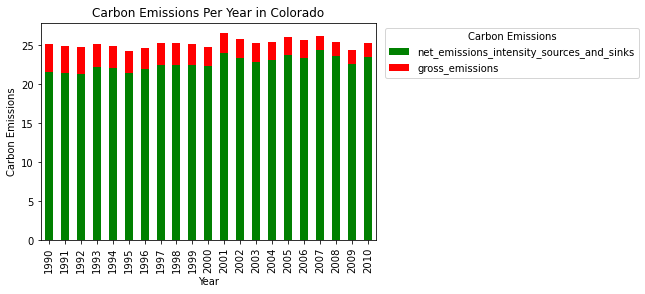

In [5]:
# Plot the data

colors = colors = ["green", "red"]

f, ax = plt.subplots()
carbon_co_df_forplot.plot.bar(stacked=True,
                                 color=colors,
                                 ax=ax).legend(loc='upper right',
                                               bbox_to_anchor=(1.8, 1.0),
                                               title='Carbon Emissions')
ax.set(title="Carbon Emissions Per Year in Colorado",
       xlabel="Year",
       ylabel="Carbon Emissions")

plt.show()